### Importação dos dados



In [1]:
import pandas as pd

caminho_base = "D:\\Estudos\\ONE-Data_Science\\base_dados\\"

loja = pd.read_csv(caminho_base + "loja_1.csv")
loja2 = pd.read_csv(caminho_base + "loja_2.csv")
loja3 = pd.read_csv(caminho_base + "loja_3.csv")
loja4 = pd.read_csv(caminho_base + "loja_4.csv")


#1. Análise do faturamento


In [2]:
# Calculando o faturamento total por loja
faturamento_loja = loja["Preço"].sum()
faturamento_loja2 = loja2["Preço"].sum()
faturamento_loja3 = loja3["Preço"].sum()
faturamento_loja4 = loja4["Preço"].sum()

# Mostrando os resultados formatados
print(f"Faturamento Loja 1: R$ {faturamento_loja:,.2f}")
print(f"Faturamento Loja 2: R$ {faturamento_loja2:,.2f}")
print(f"Faturamento Loja 3: R$ {faturamento_loja3:,.2f}")
print(f"Faturamento Loja 4: R$ {faturamento_loja4:,.2f}")


Faturamento Loja 1: R$ 1,534,509.12
Faturamento Loja 2: R$ 1,488,459.06
Faturamento Loja 3: R$ 1,464,025.03
Faturamento Loja 4: R$ 1,384,497.58


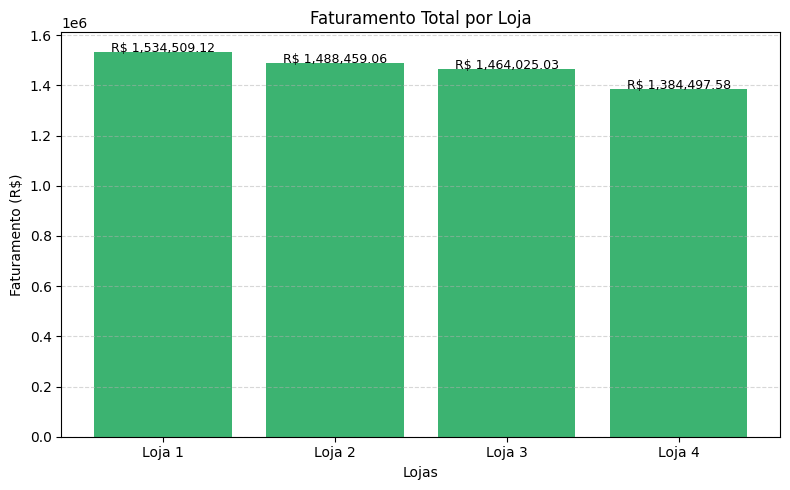

In [3]:
import matplotlib.pyplot as plt

# Gráfico de barras do faturamento
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
faturamentos = [faturamento_loja, faturamento_loja2, faturamento_loja3, faturamento_loja4]

plt.figure(figsize=(8, 5))
plt.bar(lojas, faturamentos, color='mediumseagreen')
plt.title("Faturamento Total por Loja")
plt.ylabel("Faturamento (R$)")
plt.xlabel("Lojas")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adiciona os valores em cima das barras
for i, valor in enumerate(faturamentos):
    plt.text(i, valor + 100, f"R$ {valor:,.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [4]:
# Agrupando por categoria e somando os valores
faturamento_categoria = pd.concat([loja, loja2, loja3, loja4])
faturamento_categoria = faturamento_categoria.groupby("Categoria do Produto")["Preço"].sum().sort_values(ascending=False)

# Exibindo o resultado
print("Faturamento por Categoria:\n")
for categoria, valor in faturamento_categoria.items():
    print(f"{categoria}: R$ {valor:,.2f}")


Faturamento por Categoria:

eletronicos: R$ 2,214,099.72
eletrodomesticos: R$ 1,766,337.03
moveis: R$ 1,010,214.00
instrumentos musicais: R$ 465,029.67
esporte e lazer: R$ 190,635.39
brinquedos: R$ 98,140.86
utilidades domesticas: R$ 76,773.38
livros: R$ 50,260.74


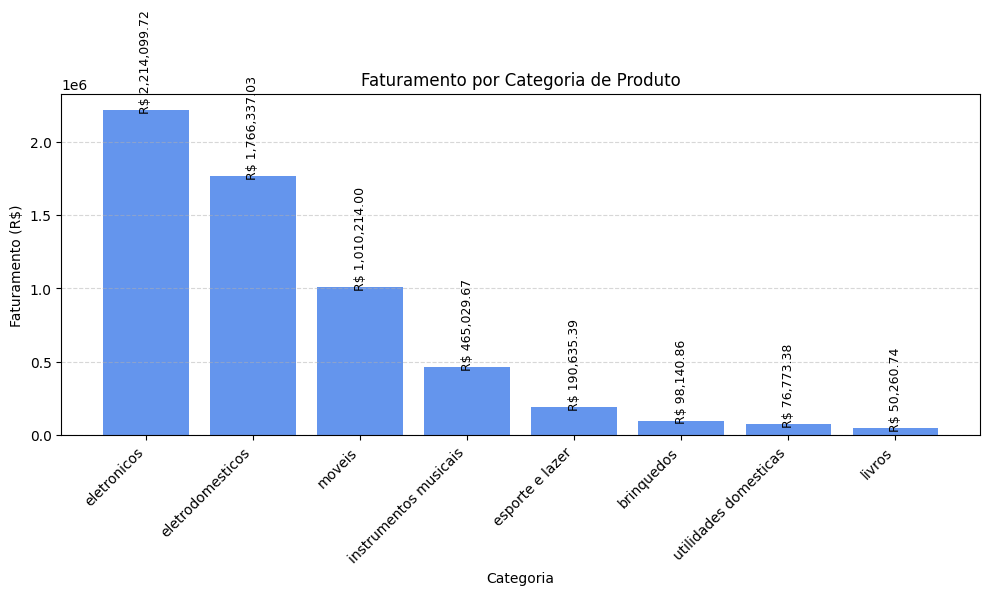

In [5]:
import matplotlib.pyplot as plt

# Gráfico de barras por categoria
plt.figure(figsize=(10, 6))
plt.bar(faturamento_categoria.index, faturamento_categoria.values, color='cornflowerblue')
plt.title("Faturamento por Categoria de Produto")
plt.xlabel("Categoria")
plt.ylabel("Faturamento (R$)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adiciona os valores em cima das barras
for i, valor in enumerate(faturamento_categoria.values):
    plt.text(i, valor + 100, f"R$ {valor:,.2f}", ha='center', fontsize=9, rotation=90)

plt.tight_layout()
plt.show()


# 3. Média de Avaliação das Lojas

In [7]:
# Calculando a média de avaliação de cada loja
media_avaliacao_loja1 = loja["Avaliação da compra"].mean()
media_avaliacao_loja2 = loja2["Avaliação da compra"].mean()
media_avaliacao_loja3 = loja3["Avaliação da compra"].mean()
media_avaliacao_loja4 = loja4["Avaliação da compra"].mean()

# Mostrando os resultados formatados
print(f"Média de Avaliação - Loja 1: {media_avaliacao_loja1:.2f}")
print(f"Média de Avaliação - Loja 2: {media_avaliacao_loja2:.2f}")
print(f"Média de Avaliação - Loja 3: {media_avaliacao_loja3:.2f}")
print(f"Média de Avaliação - Loja 4: {media_avaliacao_loja4:.2f}")


Média de Avaliação - Loja 1: 3.98
Média de Avaliação - Loja 2: 4.04
Média de Avaliação - Loja 3: 4.05
Média de Avaliação - Loja 4: 4.00


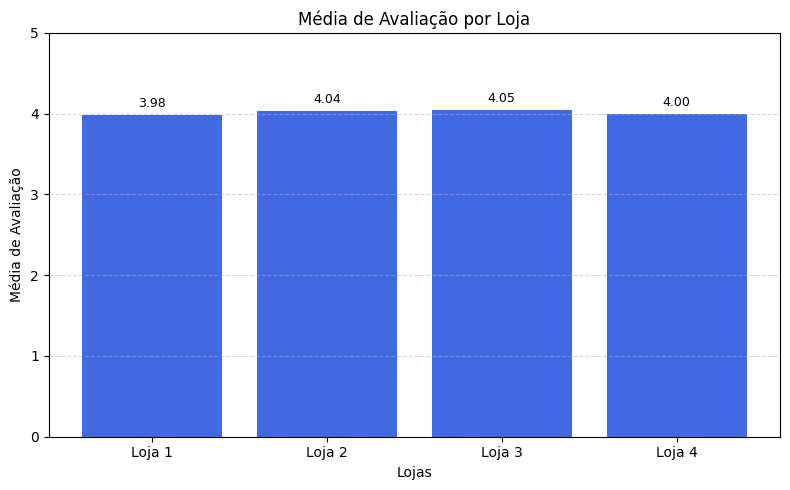

In [8]:
# Dados para o gráfico
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]
avaliacoes = [media_avaliacao_loja1, media_avaliacao_loja2, media_avaliacao_loja3, media_avaliacao_loja4]

# Criando o gráfico
plt.figure(figsize=(8, 5))
plt.bar(lojas, avaliacoes, color='royalblue')
plt.title("Média de Avaliação por Loja")
plt.ylabel("Média de Avaliação")
plt.xlabel("Lojas")
plt.ylim(0, 5)  # assumindo que a escala de avaliação vai até 5
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adiciona os valores em cima das barras
for i, valor in enumerate(avaliacoes):
    plt.text(i, valor + 0.1, f"{valor:.2f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

# 5. Frete Médio por Loja
